# Classification

#### In this project we are going to classify whether a mushroom is edible or poisonous

## 1.Import Libraries

In [181]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

## 2.Load CSV

In [182]:
mash=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data")
mash.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


#### .shape is used for knowing number of rows and columns 

In [183]:
mash.shape

(8123, 23)

## 3.Data Preparation

#### Columns in the imported data are actually are part of the data.
#### So,I've added that to the last row.
#### Now,correct the column names in the data

In [184]:
c=[pd.Series(['p', 'x', 's', 'n', 't', 'p', 'f', 'c', 'n', 'k', 'e', 'e', 's','s', 'w', 'w', 'p', 'w', 'o', 'p', 'k', 's', 'u'],index=mash.columns)]
mash=mash.append(c,ignore_index=True)
mash.columns=['label','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
mash.head()

,label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


#### There can be any duplicates in the data as there are no such things as seperate identification
#### But,here i have used unique to know how the missing values is given and where are the missing values

In [185]:
for cols in mash.columns:
    print(cols ,":", mash[cols].unique())

label : ['e' 'p']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['y' 'w' 'g' 'n' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['a' 'l' 'p' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['b' 'n']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['c' 'e' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['n' 'k' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['n' 's' 'a' 'v' 'y' 'c']
habitat : ['g' 'm' 'u' 'd' 'p' 'w' 'l']


#### Hence we can see that missing values are given as '?'
#### when we directly use dropna() the missing values cannot be removed in this dataset
#### So, I will replace "?" with np.nan
#### Then, I can call dropna() to remove missing data

In [186]:
mash=mash.replace('?',np.nan)
mash=mash.dropna()

In [187]:
mash.shape

(5644, 23)

#### values are given in alphabets but computer can only understand numbers
#### So,to provide each variable a number we use LabelEncoder
#### This classifies each variable into numbers

In [188]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for cols in mash.columns:
    mash[cols]=le.fit_transform(mash[cols])

#### Data after LabelEncoder

In [189]:
mash.head()

,label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,7,1,0,1,0,0,2,...,2,5,5,0,0,1,3,2,2,1
1,0,0,2,6,1,3,1,0,0,3,...,2,5,5,0,0,1,3,2,2,3
2,1,5,3,6,1,6,1,0,1,3,...,2,5,5,0,0,1,3,1,3,5
3,0,5,2,3,0,5,1,1,0,2,...,2,5,5,0,0,1,0,2,0,1
4,0,5,3,7,1,0,1,0,0,3,...,2,5,5,0,0,1,3,1,2,1


## 4.Data Exploration

#### Use describe() to get summary of the data

In [190]:
mash.describe()

,label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,...,5644.000000,5644.000000,5644.000000,5644.0,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000
mean,0.381999,3.420269,1.627215,4.272856,0.564139,3.564848,0.996811,0.181432,0.124734,3.536853,...,1.619419,3.949681,3.932672,0.0,0.001417,1.014883,2.096386,1.215450,3.712970,1.236003
std,0.485919,1.659641,1.336497,1.838018,0.495913,1.765806,0.056388,0.385410,0.330447,2.281428,...,0.721620,1.526058,1.525402,0.0,0.037625,0.165600,1.192716,1.059125,1.328741,1.597981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,3.000000,3.000000,0.0,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000
50%,0.000000,5.000000,2.000000,4.000000,1.000000,5.000000,1.000000,0.000000,0.000000,4.000000,...,2.000000,5.000000,5.000000,0.0,0.000000,1.000000,3.000000,1.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,6.000000,1.000000,5.000000,1.000000,0.000000,0.000000,6.000000,...,2.000000,5.000000,5.000000,0.0,0.000000,1.000000,3.000000,2.000000,5.000000,1.000000
max,1.000000,5.000000,3.000000,7.000000,1.000000,6.000000,1.000000,1.000000,1.000000,8.000000,...,3.000000,6.000000,6.000000,0.0,1.000000,2.000000,3.000000,5.000000,5.000000,5.000000


#### We can removie veil-type as it has only one value.
#### Hence it does help much for classification model

In [191]:
mash=mash.drop(["veil-type"],axis=1)

#### Violinplot is useful for Clearly Understanding of the data
#### We can see distributions of the labels in each features with values

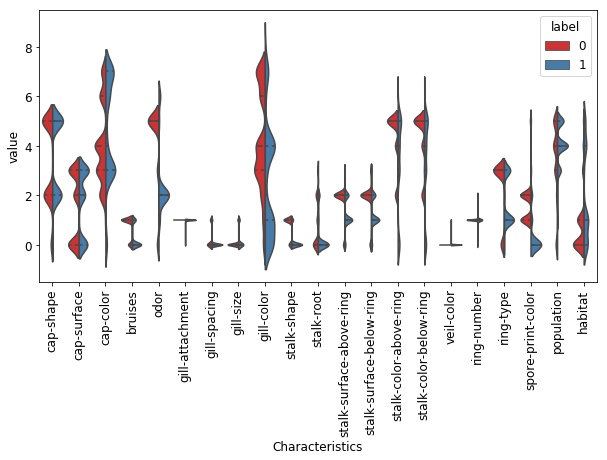

In [192]:
mash1 = pd.melt(mash, "label", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="label", split = True, data=mash1, inner = 'quartile', palette = 'Set1')
mash2 = mash.drop(["label"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(mash2.columns));

#### Bar charts are used to know if the data is balanced or not

0    3488
1    2156
Name: label, dtype: int64


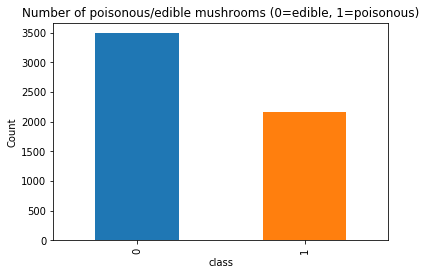

In [19]:
plt.figure()
pd.Series(mash['label']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)')
print(mash['label'].value_counts())

#### 61% are 0's and 39% are 1's
#### Labels are hence balanced 

#### Let's find the correlations between each labels
#### We can also know which features are highly correlated with label

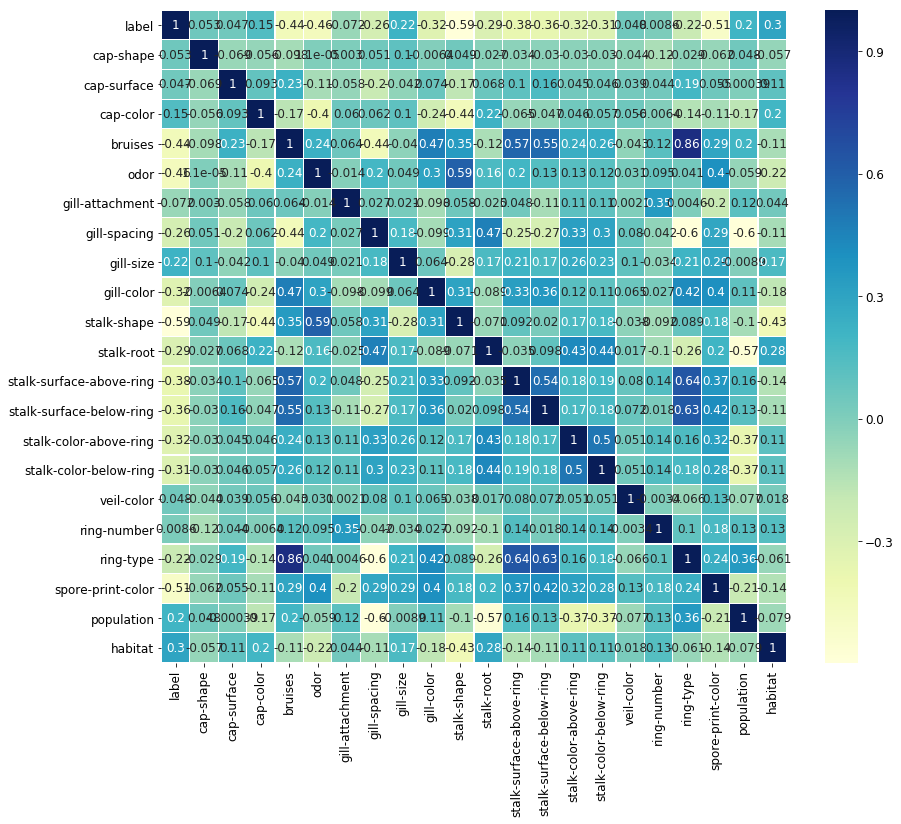

In [169]:
plt.figure(figsize=(14,12))
sns.heatmap(mash.corr(),linewidths=.2,cmap="YlGnBu",annot=True)
plt.yticks(rotation=0);

#### By this plot we can say that:
#### Stalk-shape is negetively correlated,So When the Stalk-shape is tapering then mushrooms are likely to be edible
#### Similarly, mushrooms with broad gill size are somewhat likely to be edible

## 5.Splitting data for train and test

#### Take all the features in X
#### Take the label in y

In [150]:
X=mash.drop(['label'],axis=1)
y=mash['label']

#### Randomly Splitting data into test set and train set

In [204]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [213]:
print(X_test.shape)
print(X_train.shape)

(1694, 21)
(3950, 21)


## 6.Model Evaluation

#### I'm going to use DecisionTreeClassifier

In [205]:
from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier() 
clf.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### test score and train score of my model

In [206]:
print(clf.score(X_test,y_test))
print(clf.score(X_train,y_train))

1.0
1.0


#### So,It is a good fit because it does good in both train and test sets
#### Let's evaluate further more

In [197]:
y_pred = clf.predict(X_test)  
y_pred1 = clf.predict(X_train)

In [198]:
(y_pred==y_test).value_counts()

True    1694
Name: label, dtype: int64

#### Got perfect predictions on test set

In [199]:
(y_pred1==y_train).value_counts()

True    3950
Name: label, dtype: int64

#### Got perfect predictions on train set too

#### Let's calculate confusion matrix and find classification_report

In [200]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_train, y_pred1))  

[[1047    0]
 [   0  647]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2441
           1       1.00      1.00      1.00      1509

   micro avg       1.00      1.00      1.00      3950
   macro avg       1.00      1.00      1.00      3950
weighted avg       1.00      1.00      1.00      3950



#### There are zero errors in the model till now

#### Let's calculate accuracy and precision scores

In [201]:
from sklearn.metrics import accuracy_score,precision_score
print("Accuracy is ", accuracy_score(y_train,y_pred1)*100)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  100.0
Accuracy is  100.0


In [202]:
print("Precision score is ", precision_score(y_train,y_pred1)*100)
print("Precision score is ", precision_score(y_test,y_pred)*100)

Precision score is  100.0
Precision score is  100.0


#### Now let's see roc_auc_scores

In [212]:
y_pred_probs = clf.predict_proba(X_test)
y_pred_probs = y_pred_probs[:, 1]
print(metrics.roc_auc_score(y_test, y_pred_probs))

1.0


#### Now let's see cross validation score 

In [207]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=10).mean()

0.9829484902309058

#### So,got 98% score on cross validation
#### So,overall this is a good model

### Now,Let's see how this model works through plotting

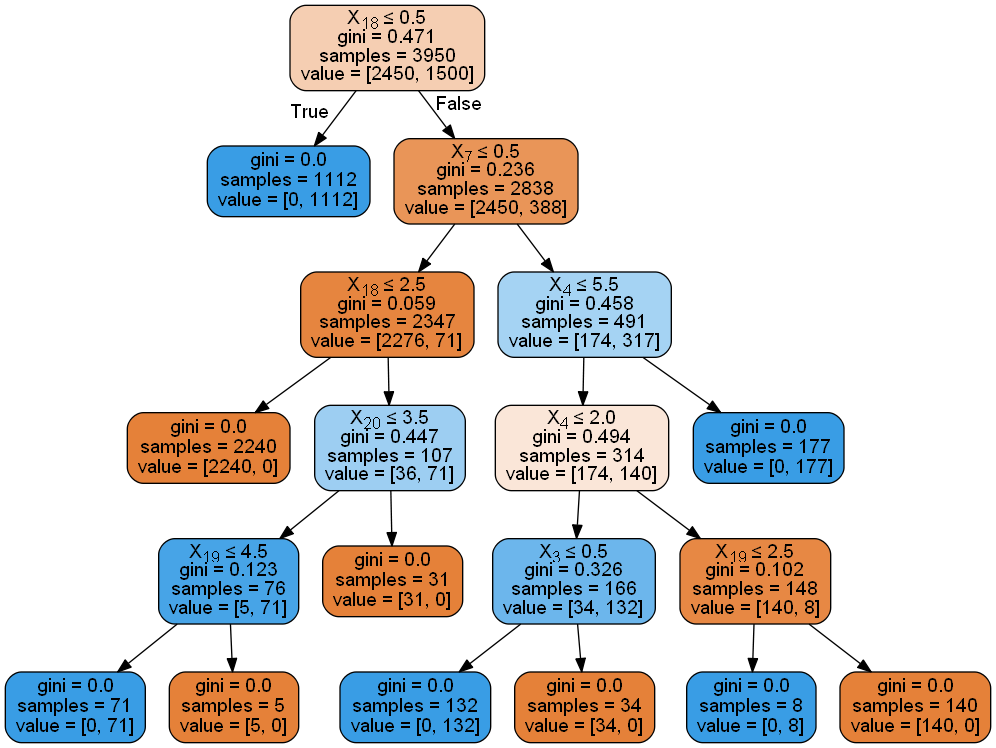

In [163]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### So,through plotting we can understand how this model has worked 


###  So,We can gather the details of the each feature of the mushrooms and then implement this model by using the features of that mushrooms and know whether that mushroom is eatable or not.